In [3]:
import pandas as pd

# Create data for the employee salary dataset
data = {
    'Years of Experience': [1, 2, 3, 5, 10, 4, 7, 8, 2, 6,
                            3, 5, 8, 10, 1, 3, 6, 9, 12, 7,
                            4, 5, 11, 9, 2, 8, 7, 5, 6, 4,
                            3, 2, 1, 5, 6, 10, 8, 4, 7, 3,
                            5, 2, 9, 12, 1, 6, 3, 4, 10, 5],

    'Education Level': [1, 2, 2, 3, 3, 1, 2, 2, 1, 3,
                        2, 2, 3, 3, 1, 2, 2, 3, 3, 1,
                        1, 2, 3, 3, 1, 2, 2, 3, 3, 1,
                        2, 1, 1, 3, 2, 3, 2, 1, 2, 1,
                        3, 2, 2, 3, 1, 2, 3, 3, 2, 2],

    'Hours Worked per Week': [40, 42, 38, 45, 50, 40, 35, 45, 40, 48,
                               38, 42, 40, 50, 30, 40, 45, 48, 50, 40,
                               38, 35, 40, 45, 32, 40, 38, 45, 48, 50,
                               40, 38, 42, 45, 50, 35, 40, 42, 48, 38,
                               50, 40, 35, 45, 30, 42, 38, 40, 45, 50],

    'Performance Rating': [3, 4, 3, 5, 5, 2, 3, 4, 3, 5,
                           4, 3, 5, 4, 2, 3, 4, 5, 5, 3,
                           4, 3, 5, 4, 2, 3, 5, 5, 4, 3,
                           2, 3, 4, 5, 4, 5, 5, 3, 4, 3,
                           4, 5, 3, 4, 2, 3, 4, 5, 5, 4],

    'Salary': [45000, 50000, 55000, 65000, 80000, 48000, 53000, 60000, 50000, 70000,
               54000, 56000, 62000, 75000, 40000, 55000, 60000, 72000, 85000, 59000,
               52000, 58000, 75000, 70000, 43000, 62000, 59000, 54000, 60000, 55000,
               47000, 43000, 40000, 60000, 70000, 85000, 72000, 54000, 67000, 48000,
               65000, 60000, 48000, 70000, 39000, 55000, 49000, 58000, 80000, 61000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to a CSV file
df.to_csv('employee_salaries.csv', index=False)

print("Dataset created and saved as 'employee_salaries.csv'")


Dataset created and saved as 'employee_salaries.csv'


   Years of Experience  Education Level  Hours Worked per Week  \
0                    1                1                     40   
1                    2                2                     42   
2                    3                2                     38   
3                    5                3                     45   
4                   10                3                     50   

   Performance Rating  Salary  
0                   3   45000  
1                   4   50000  
2                   3   55000  
3                   5   65000  
4                   5   80000  
Mean Squared Error: 22672194.600023463
R-squared: 0.8500615395805604

Actual vs Predicted:
   Actual Salaries  Predicted Salaries
0            75000        71858.709906
1            48000        49526.003813
2            47000        45266.708600
3            55000        56715.771831
4            72000        73511.475046
5            80000        75066.313214
6            59000        66316.833773
7       

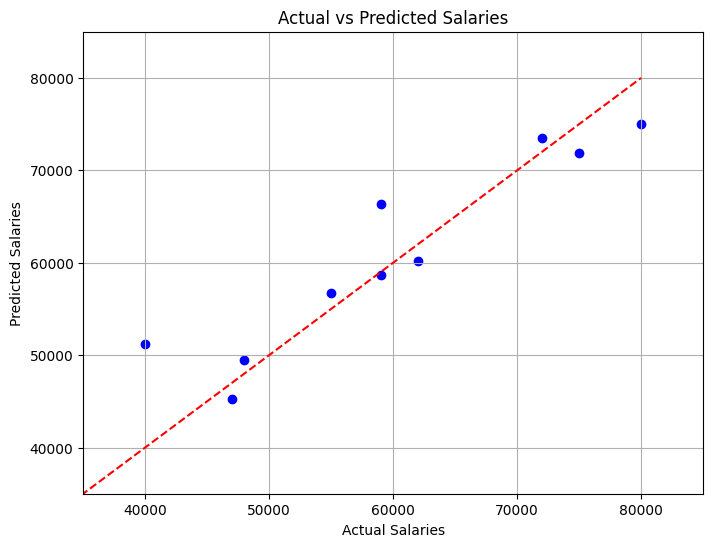

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('employee_salaries.csv')

# Display the first few rows of the dataset
print(df.head())

# Define features (X) and target variable (y)
X = df[['Years of Experience', 'Education Level', 'Hours Worked per Week', 'Performance Rating']]
y = df['Salary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust the alpha parameter for regularization strength

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print actual and predicted values in two columns
results = pd.DataFrame({'Actual Salaries': y_test.values, 'Predicted Salaries': y_pred})
print("\nActual vs Predicted:")
print(results)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs Predicted Salaries')

# Draw the ideal line
plt.plot([0, y_test.max()], [0, y_test.max()], color='red', linestyle='--')

# Set limits to minimize empty space
plt.xlim(y_test.min() - 5000, y_test.max() + 5000)
plt.ylim(y_test.min() - 5000, y_test.max() + 5000)

plt.grid()
plt.show()
